In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Modelo Linear

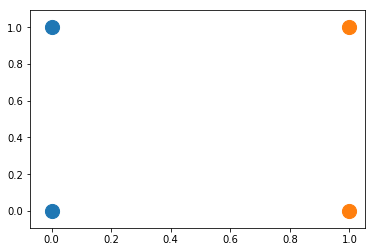

In [2]:
class_A = np.array([[0,0], [0,1]])
class_B = np.array([[1,1], [1,0]])

X = np.append(class_A, class_B, axis=0)
Y = np.expand_dims(np.array([0,0,1,1]), axis=-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(class_A[:,0], class_A[:,1], s=200)
ax.scatter(class_B[:,0], class_B[:,1], s=200)

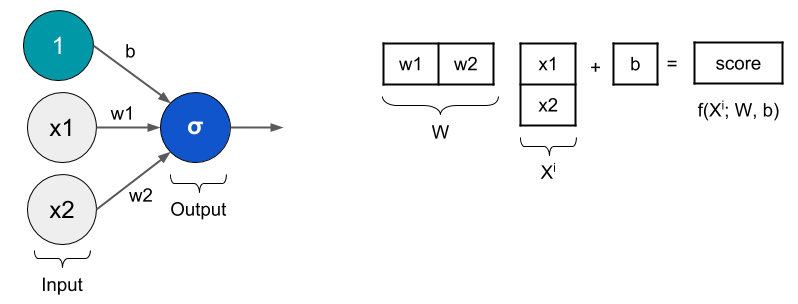

In [3]:
from IPython.display import Image
Image(filename='figs/perceptron.png')

**Função de ativação: sigmoide**

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.y          = y
        self.weights1   = np.random.rand(self.input.shape[1],1)
        self.bias       = np.random.random()
        self.output     = np.zeros(self.y.shape)
        self.error      = np.zeros(self.y.shape)

    def forward(self):
        self.output = sigmoid(np.dot(self.input, self.weights1) + self.bias)

    def backprop(self):
        # registro do erro para plotar depois
        self.error = abs(self.y - self.output)
        # cálculo do gradiente
        delta      = (2*(self.y - self.output) * sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, delta)
        d_bias     = np.sum(delta)
        # atualização dos pesos
        self.weights1 += d_weights1
        self.bias     += d_bias
    
    def predict(self, x):
        self.input = x
        self.forward()
        return self.output

(   Y_true    Y_pred
0     0.0  0.022134
1     0.0  0.017898
2     1.0  0.981991
3     1.0  0.985450,)


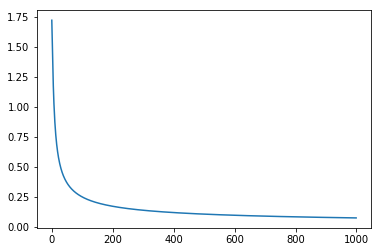

In [6]:
nn = NeuralNetwork(X, Y) 
all_error = []
for i in range(1000):
    nn.forward()
    nn.backprop()
    all_error.append(np.squeeze(nn.error))

table = np.append(Y, nn.predict(X), axis=1)
df = pd.DataFrame(table,columns=['Y_true', 'Y_pred']),
print df

plt.plot(range(len(all_error)), np.sum(all_error, axis=1) )

### Agora vamos tentar um problema não linearmente separável
**problema do XOR**

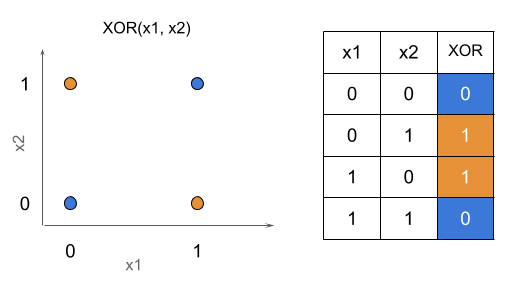

In [7]:
from IPython.display import Image
Image(filename='figs/xor.png')

Text(0.5,0,u'x1')

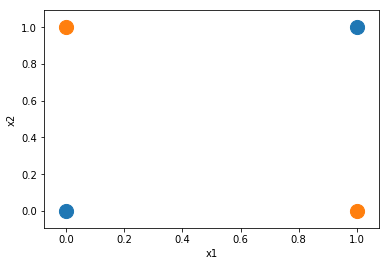

In [8]:
class_A = np.array([[0,0], [1,1]])
class_B = np.array([[0,1], [1,0]])

X = np.append(class_A, class_B, axis=0)
Y = np.expand_dims(np.array([0,0,1,1]), axis=-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(class_A[:,0], class_A[:,1], s=200)
ax.scatter(class_B[:,0], class_B[:,1], s=200)
ax.set_ylabel('x2')
ax.set_xlabel('x1')

In [9]:
nn = NeuralNetwork(X, Y) 
all_error = []
for i in range(1000):
    nn.forward()
    nn.backprop()
    all_error.append(np.squeeze(nn.error))

table = np.append(Y, nn.predict(X), axis=1)
df = pd.DataFrame(table,columns=['Y_true', 'Y_pred']),
print df

(   Y_true  Y_pred
0     0.0     0.5
1     0.0     0.5
2     1.0     0.5
3     1.0     0.5,)


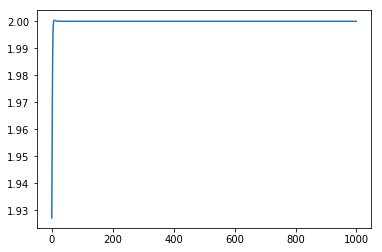

In [10]:
plt.plot(range(len(all_error)), np.sum(all_error, axis=1) )